In [24]:
#1 import all libraries required : (e.g: numpy and pandas, sklearn, matplotlib, etc)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import statistics as st
import numpy as np
import seaborn as sb
from sklearn import svm
from sklearn.metrics import accuracy_score as ac

In [34]:
#2 Import dataset into variable
df = pd.read_csv(r"C:\Users\tiffa\Downloads\Heart.csv")
df.dropna(inplace=True)

In [35]:
#3 shows attributes, number of data and the data types for each attributes 
# AHD is Acquired heart diseases ~ later will be used as "TARGET Class"
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   Age         297 non-null    int64  
 2   Sex         297 non-null    int64  
 3   ChestPain   297 non-null    object 
 4   RestBP      297 non-null    int64  
 5   Chol        297 non-null    int64  
 6   Fbs         297 non-null    int64  
 7   RestECG     297 non-null    int64  
 8   MaxHR       297 non-null    int64  
 9   ExAng       297 non-null    int64  
 10  Oldpeak     297 non-null    float64
 11  Slope       297 non-null    int64  
 12  Ca          297 non-null    float64
 13  Thal        297 non-null    object 
 14  AHD         297 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 37.1+ KB


In [36]:
#4 remove column 'Unnamed: 0'
df.drop(df.columns[[0]], axis=1, inplace=True)

In [37]:
#5 print 'Data First 5 Rows Show'
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [38]:
#6 print 'Data Last 5 Rows Show'
df.tail()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [29]:
#7 print the statistic of the dataset (count, mean, SD, min, max, etc )
df.

In [41]:
#8 check null on all data and If data has null, by sum of null data's
df.isnull()
#by sum of null datas
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64

In [52]:
#9 Try removing all the rows from the dataset that contain missing values. How many are left?
df.dropna()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


AttributeError: type object 'map' has no attribute 'show'

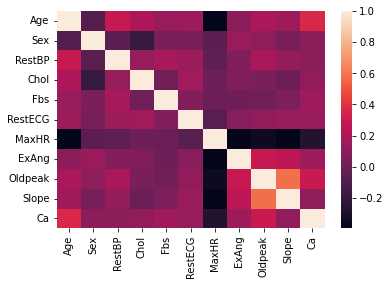

In [63]:
#10 Show statistical correlation value from each column using SNS heatmap
# plotting correlation heatmap
import seaborn as sb
dataplot= sb.heatmap(df.corr())
  
# displaying heatmap
map.show()

In [58]:
#11 Print variance age data from dataset
print("Variance of sample set is % s"%(st.variance(df)))

NameError: name 'st' is not defined

In [68]:
#12 Please divide data into three groups: the elderly (>55yo),middle-aged(40-55yo), young(<40yo) people by looking at the age ranges.
df["Age_Group"] = np.where(df["Age"]>55, df["Age"]>=40 & df["Age"]<=55, (df["Age"]<40), "The eldery", "Middle-aged", "Young")
df.info()
df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#13 Show the data count for each age based on their groups: elderly, middle-aged, young people and please show it in a Bar Plot


In [ ]:
#14 add a new column 'AgeRange' and put the correct value based on the age category. Then plot a categorical scatterplot to show each observation. Your chart will show something like this


In [70]:
#16 Some of the data is still in string, so we need to change it to numeric (ChestPain, Thal, and AHD)
pd.to_numeric(df)

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
#17 Please show the statistical correlation value (Hint: use function corr) amongst all the columns in the dataset


In [ ]:
#18 Please normalize the data (hint: use StandardScaler)


In [71]:
#19 Split dataset into two subsets: train and test sets (Train: 67%, Test: 33%)
#splitting data
feature_col = ["Age"]
x = df[feature_col]
y = df["Age_Group"]

#Dividing it into train set data and test set data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 9)

#checking the train and test data
x_train
y_train
x_test
y_test

KeyError: 'Age_Group'